# Project Playthrough
### Feature Selection and Data Visualization

Original work : https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization/notebook

![roadmap](https://preview.ibb.co/bKsv9k/k.jpg)

# Introduction

* 피처 셀렉션 및 데이터 시각화에 초점을 맞춘 프로젝트.
* 피처 셀렉션 사용 기법 (또는 기준)
   * correlation
   * univariate feature selection
   * recursive feature elimination
   * recursive feature elimination with cross validation
   * tree-based feature selection
* 주성분 숫자 파악을 위하여 PCA 사용

In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
print(check_output(["ls", "input/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data.csv



In [28]:
data = pd.read_csv('input/data.csv')

In [29]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

1. **id** = 분류 모델에 사용할 수 없는 feature
2. **Diagnosis** = 클래스 라벨 (타깃 라벨)
3. **Unnamed:32** = NaN값을 포함하므로 버림


In [31]:
col = data.columns
col

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [32]:
# y includes our labels and x includes our features
y = data.diagnosis
list2drop = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(list2drop, axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


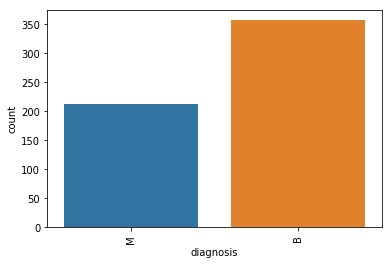

212 357


In [33]:
ax = sns.countplot(y, label="Count");plt.show()
B, M = y.value_counts()
print(M, B)

### 우리가 현재 가진 feature의 의미는 무엇이며, 얼마나 우리가 feature에 대해 알아야 하는가

의미 하나하나를 알아야 할 필요는 없다. 그러나 분산, 표준편차, 샘플 개수 또는 min-max값을 점검함으로써 데이터의 특성을 파악할 수 있다.

* 예를 들면, `area_mean` feature의 최대값은 2500이며 `smoothness_mean` feature의 최대값은 0.16340이다.
* 표준화/ 정규화 처리의 필요성.

In [34]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Visualization

* 피처 셀렉션이 아닌 피처 특성을 파악하기 위한 시각화로, 주로 violin plot과 swarm plot을 사용한다.
* violin / swarm plot을 그리기 전에 표준화 또는 정규화 처리를 해 주어야 한다.
   * feature간의 절대값 차이가 매우 크게 나기 때문.
   * 10개씩 끊어서 시각화.

In [42]:
def draw_features_violin(xx, yy, figsize, start, end):
    
    data_ = xx
    data_n_2 = (data_ - data_.mean()) / data_.std()
    data_ = pd.concat([yy, data_n_2.iloc[:, start:end]], axis=1)
    data_ = pd.melt(data_,
              id_vars = "diagnosis",
              var_name = "features",
              value_name = "value")

    plt.figure(figsize=figsize)
    sns.violinplot(x="features",
                  y="value",
                  hue="diagnosis",
                  data=data_,
                  split=True,
                  inner="quart")
    plt.xticks(rotation=90)
    plt.show()
    

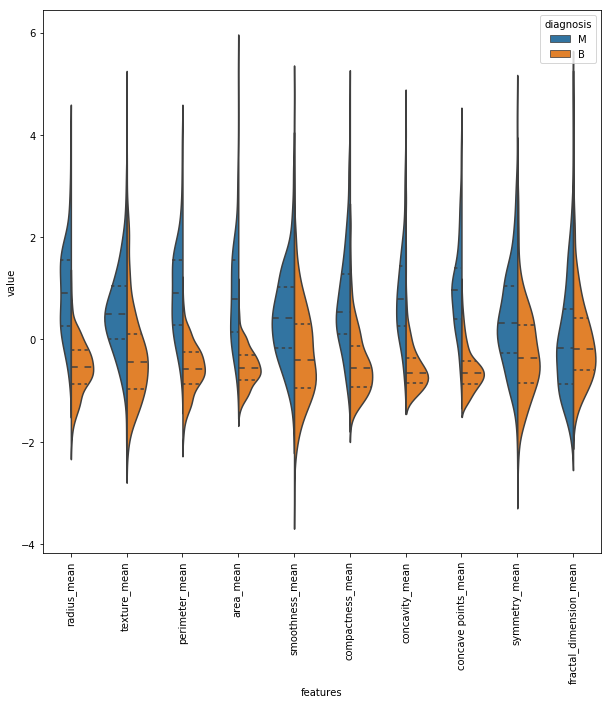

In [43]:
# first ten features
draw_features_violin(x, y, (10,10), 0, 10)

### Visualization Interpreting

Example

* `texture_mean` - medians for Malignant and Benign are seperated; good for classification.
* `fractal_dimension_mean` - not good information for classification.

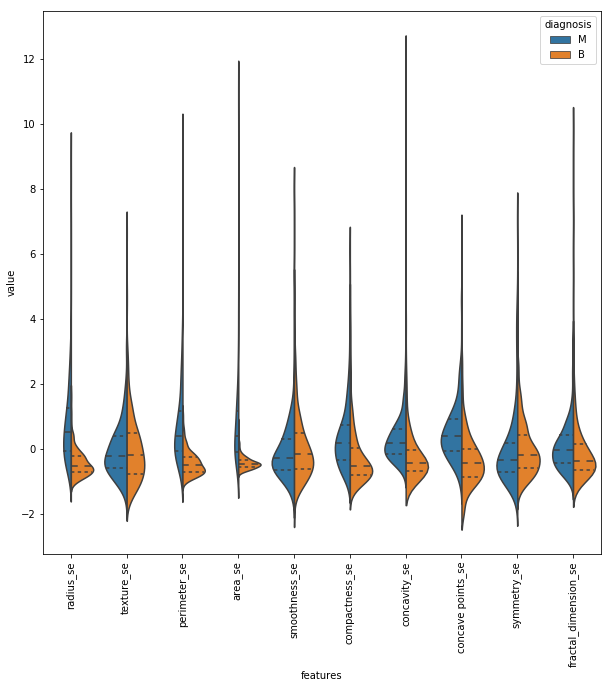

In [44]:
# second ten features
draw_features_violin(x, y, (10,10), 10, 20)

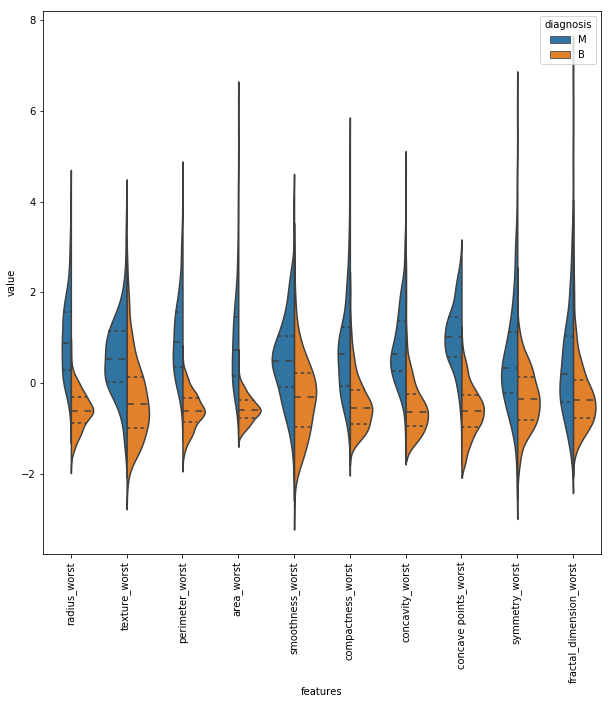

In [45]:
# third ten features
draw_features_violin(x, y, (10,10), 20, 30)

### Interpret one more thing...

`concavity_worst` vs. `concave point_worst`
* 비슷한 정보를 담은 것으로 추정됨
* correlation을 어떻게 알 수 있을까?
   * **Joint Plot**!


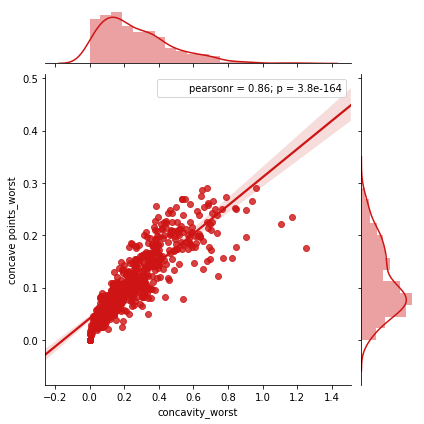

In [49]:
sns.jointplot(x.loc[:, 'concavity_worst'], 
              x.loc[:, 'concave points_worst'],
             kind='regg',
             color='#ce1414');plt.show()

### Feature Comparison over 3+ Features

* **Grid Plot**


/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


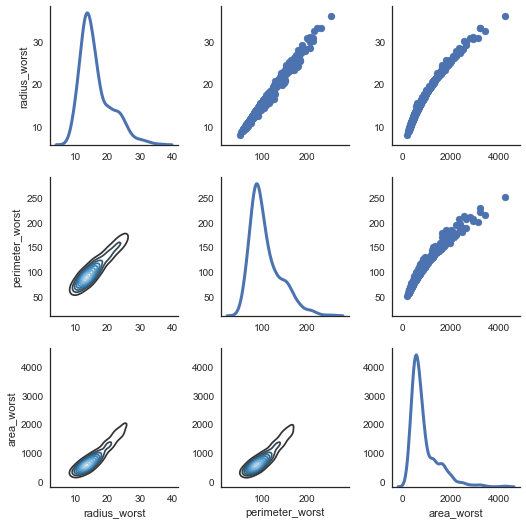

In [52]:
sns.set(style='white')
df = x.loc[:, ['radius_worst', 'perimeter_worst', 'area_worst']]

g = sns.PairGrid(df, diag_sharey = False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

# Using Swarm Plot

* Swarm plot을 사용해서 중앙값 분포와 개별 데이터 분산도를 한 번에 확인
* Swarm plot의 형태가 유사하다면, feature correlation이 높은 것

In [53]:
def draw_features_swarm(xx, yy, figsize, start, end):

    sns.set(style="whitegrid", palette="muted")
    data_dia = yy
    data_ = xx
    data_n_2 = (data_ - data_.mean()) / (data_.std())              # standardization
    data_ = pd.concat([yy,
                       data_n_2.iloc[:, start:end]],
                       axis=1)
    data_ = pd.melt(data_,
                    id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
    plt.figure(figsize=figsize)
    tic = time.time()
    sns.swarmplot(x="features", 
                  y="value", 
                  hue="diagnosis", 
                  data=data_)

    plt.xticks(rotation=90)
    plt.show()

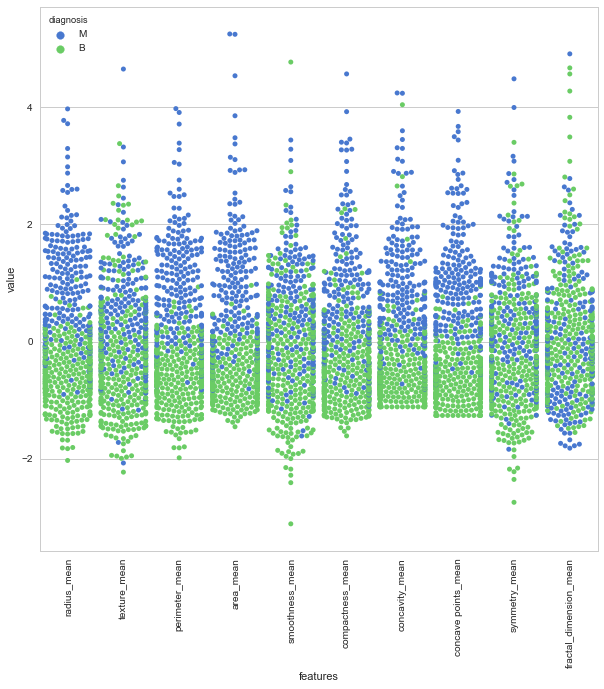

In [54]:
# first 10 features in swarm plot
draw_features_swarm(x, y, (10,10), 0, 10)

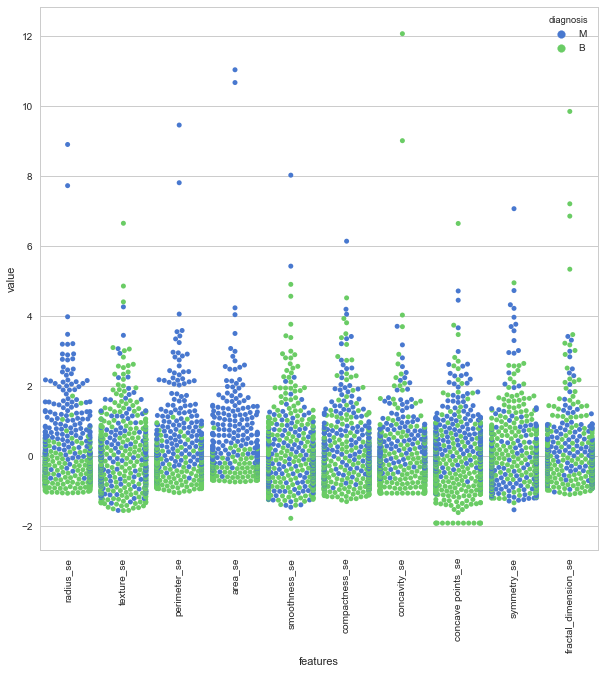

In [55]:
# second 10 features in swarm plot
draw_features_swarm(x, y, (10,10), 10, 20)

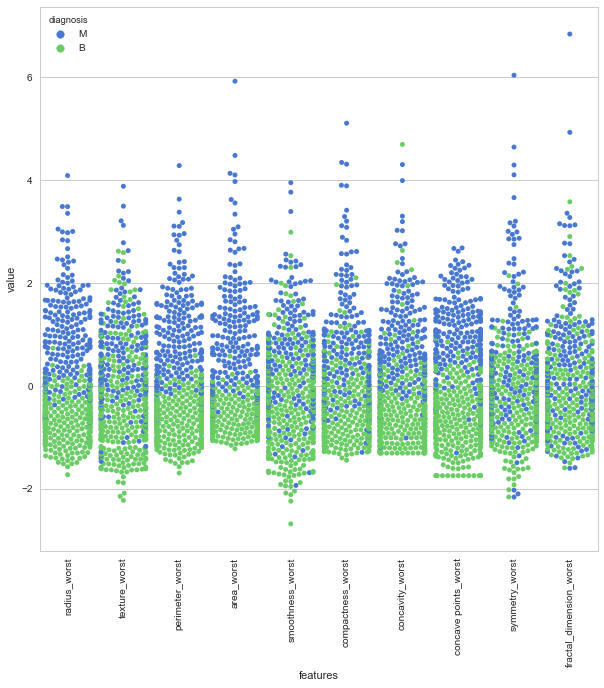

In [56]:
# third 10 features in swarm plot
draw_features_swarm(x, y, (10,10), 20, 30)

# Observe all correlation between features
* Heatmap

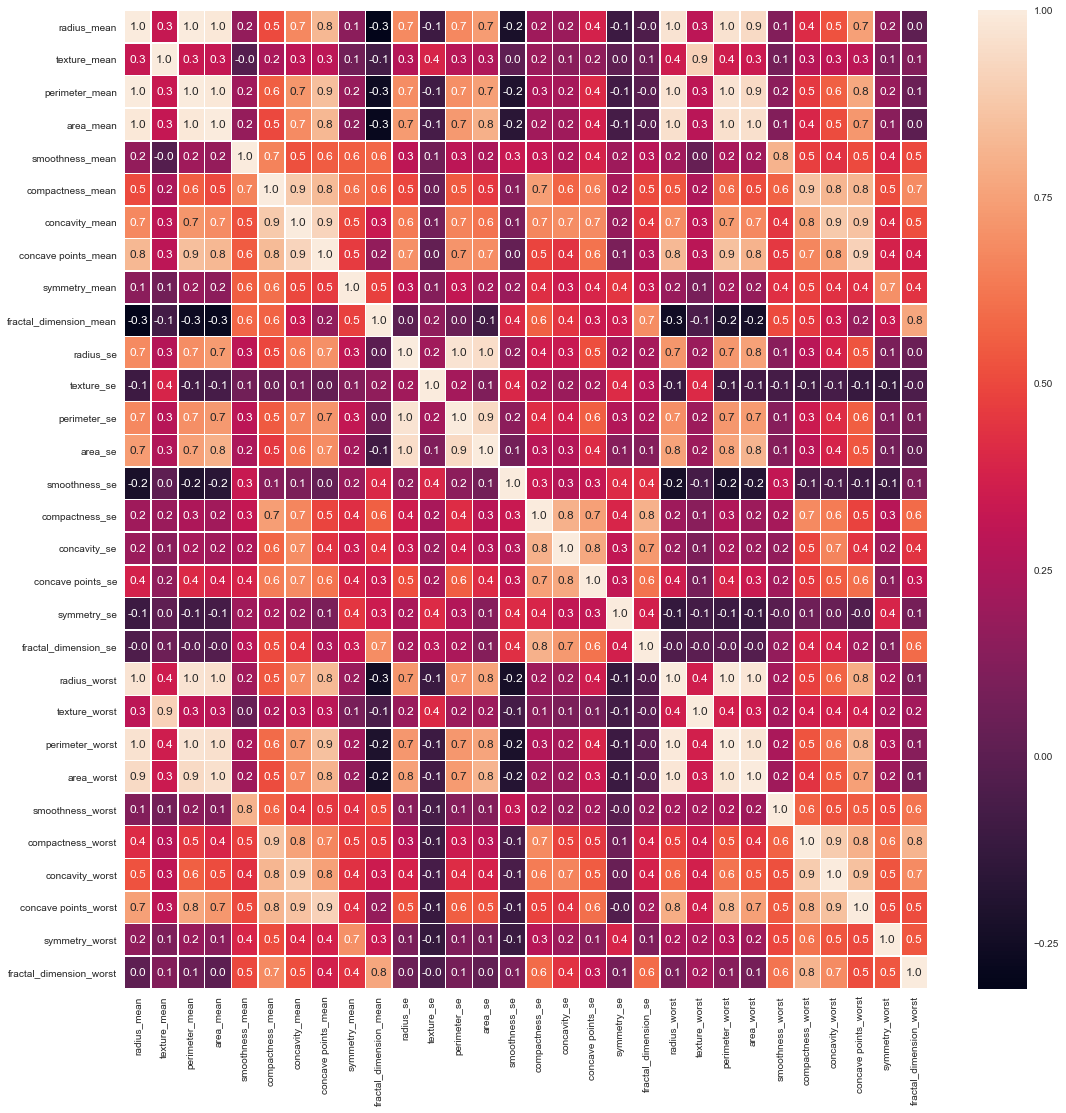

In [57]:
#correlation map
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), 
            annot=True, 
            linewidths=.5, 
            fmt= '.1f',
            ax=ax)
plt.show()

# Feature Selection & RandomForest Classification

* 다양한 메소드/기준을 통해서 feature selection 진행.
* 학습 및 예측에 사용할 모델은 Random Forest 사용.

### 1. Feature Selection with Correlation and Random Forest Classification

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.
<br>

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [61]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        
# do not modify x, we will use it later 

x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

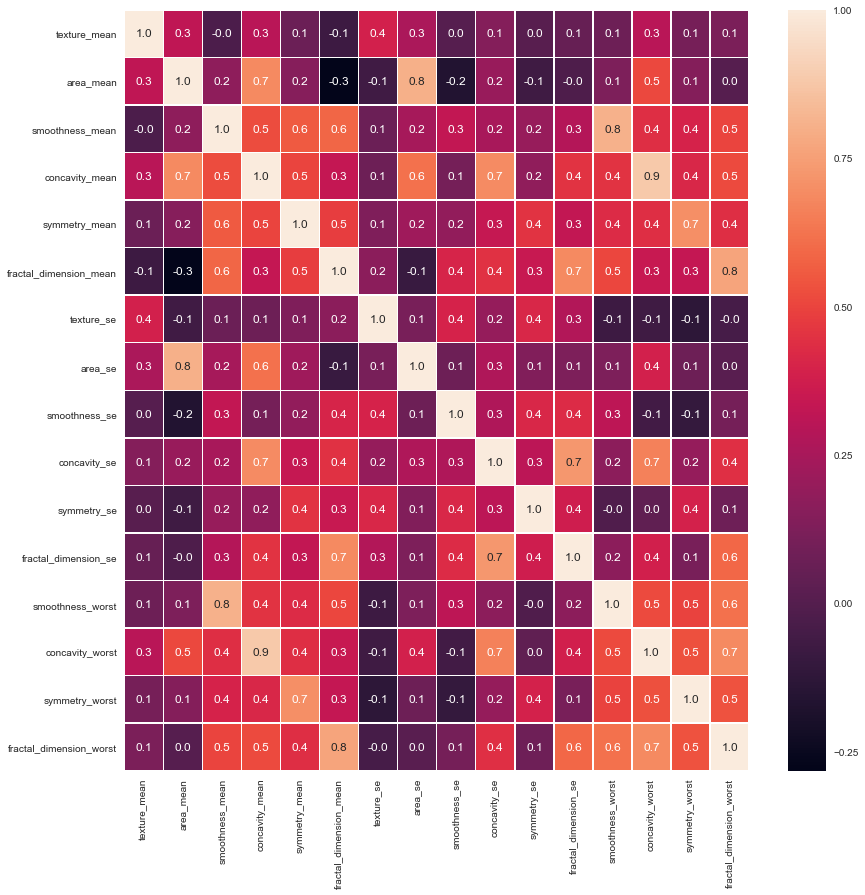

In [62]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Well, we choose our features but did we choose correctly ? Lets use random forest and find accuracy according to chosen features.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy is:  0.953216374269


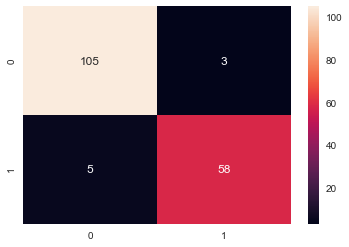

In [64]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))

sns.heatmap(cm,
            annot=True,
            fmt="d")
plt.show()

Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other feature selection methods to find better results.